# **LOAN APPROVAL**

In [ ]:
!pip install opendatasets

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [ ]:
dataset='https://raw.githubusercontent.com/NishaSirdesai09/datascience_002810901/main/loan_approval_ds.csv'

In [ ]:
data = pd.read_csv(dataset)

# Display the first few rows of the DataFrame
print(data.head())

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

This cell loads a dataset from the provided URL using pandas read_csv function. The dataset is assigned to the variable data, which is a pandas DataFrame.
Furthermost, displaying first five rows of the dataset

# Data Exploration

In [ ]:
# Identify the data types (Numeric/Categorical)
data_types = data.dtypes
numeric_data = data.select_dtypes(include=['float64', 'int64'])
categorical_data = data.select_dtypes(include=['object'])

print("Numeric Columns:\n", numeric_data.columns)
print("\nCategorical Columns:\n", categorical_data.columns)

Numeric Columns:
 Index(['loan_id', ' no_of_dependents', ' income_annum', ' loan_amount',
       ' loan_term', ' cibil_score', ' residential_assets_value',
       ' commercial_assets_value', ' luxury_assets_value',
       ' bank_asset_value'],
      dtype='object')

Categorical Columns:
 Index([' education', ' self_employed', ' loan_status'], dtype='object')


In [ ]:
# Displaying last 5 lines of the dataframe
print(data.tail())

      loan_id   no_of_dependents      education  self_employed   income_annum  \
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_as

In [ ]:
# Getting information for each columns
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None


# Missing Values

In [ ]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

There are no missing values present for the dataset

In [ ]:
# Descriptive Statistics of each column
print(data.describe().T)
# Percentage of null/missing values for each column
print("\nMissing Value Percentages:\n", data.isna().mean() * 100)

                            count          mean           std       min  \
loan_id                    4269.0  2.135000e+03  1.232498e+03       1.0   
 no_of_dependents          4269.0  2.498712e+00  1.695910e+00       0.0   
 income_annum              4269.0  5.059124e+06  2.806840e+06  200000.0   
 loan_amount               4269.0  1.513345e+07  9.043363e+06  300000.0   
 loan_term                 4269.0  1.090045e+01  5.709187e+00       2.0   
 cibil_score               4269.0  5.999361e+02  1.724304e+02     300.0   
 residential_assets_value  4269.0  7.472617e+06  6.503637e+06 -100000.0   
 commercial_assets_value   4269.0  4.973155e+06  4.388966e+06       0.0   
 luxury_assets_value       4269.0  1.512631e+07  9.103754e+06  300000.0   
 bank_asset_value          4269.0  4.976692e+06  3.250185e+06       0.0   

                                 25%         50%         75%         max  
loan_id                       1068.0      2135.0      3202.0      4269.0  
 no_of_dependents       

# DATA CLEANING :

For removing spaces from column names, ensure the operation's necessity is evaluated.

In [ ]:
# Assuming there are unwanted spaces in column names
data.columns = data.columns.str.strip().str.replace(' ', '_')
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

# Data Visualization

**1. Histograms for Each Column:**

Utilize a loop for individual customization or seaborn for aesthetics improvement.

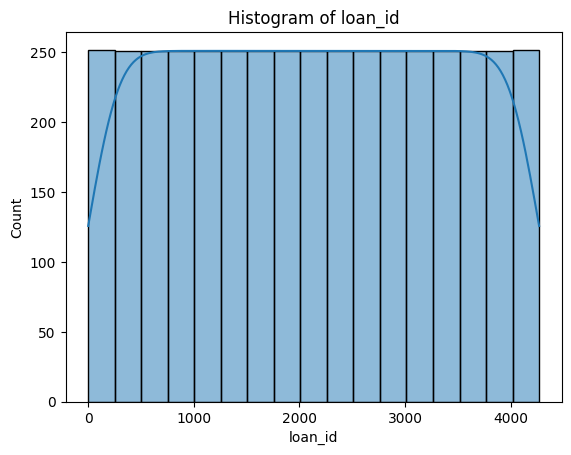

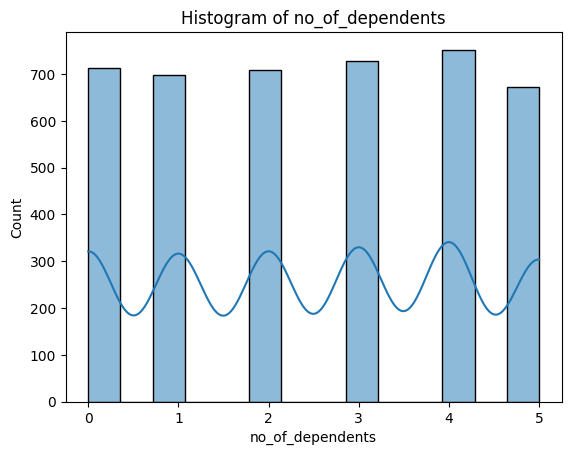

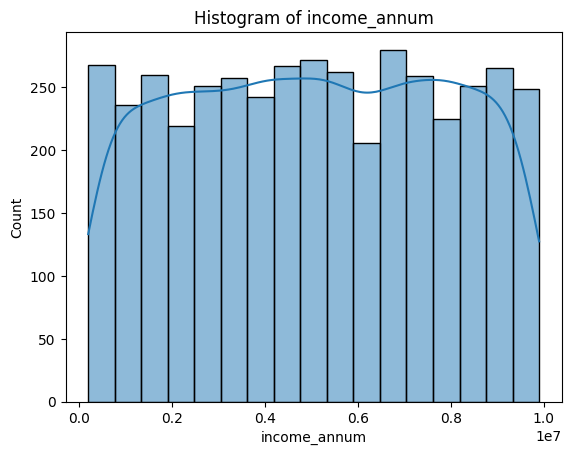

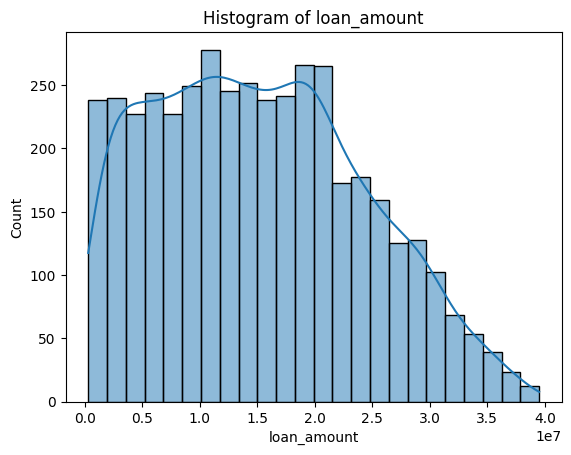

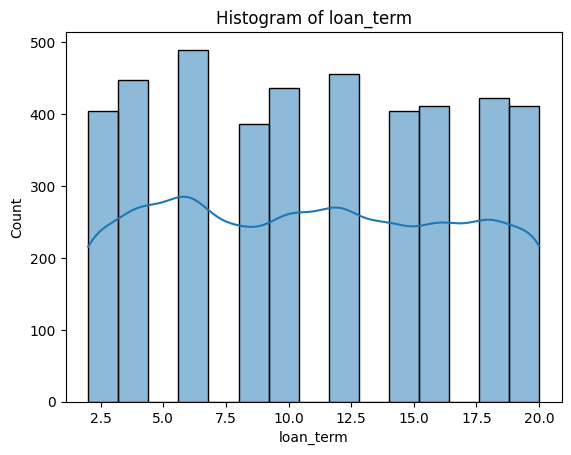

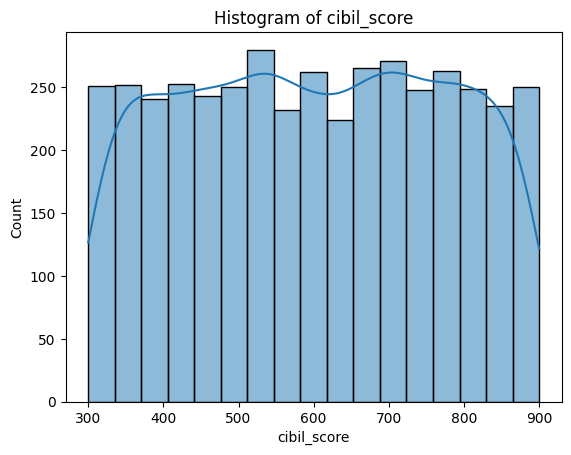

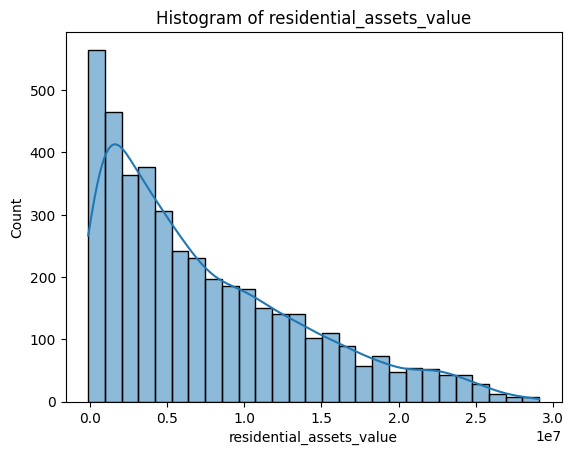

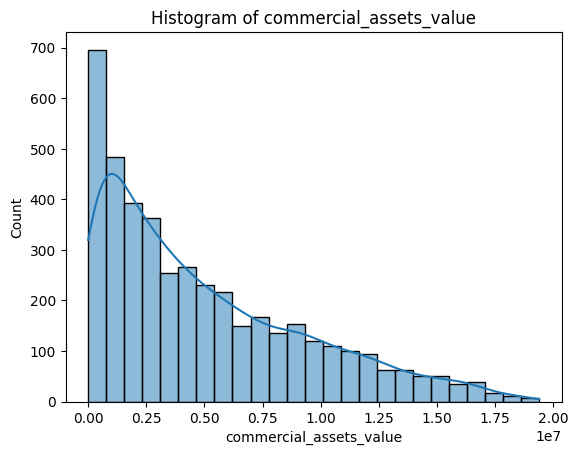

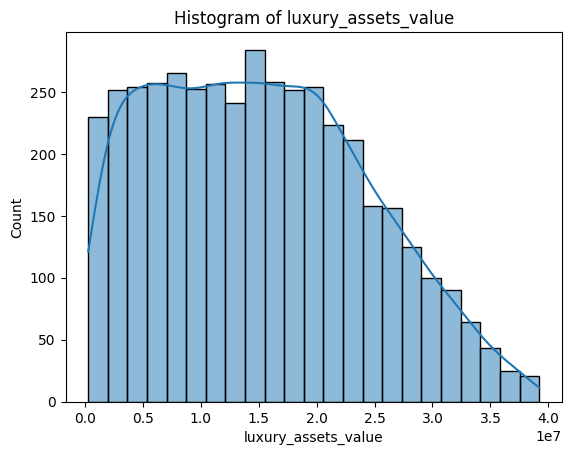

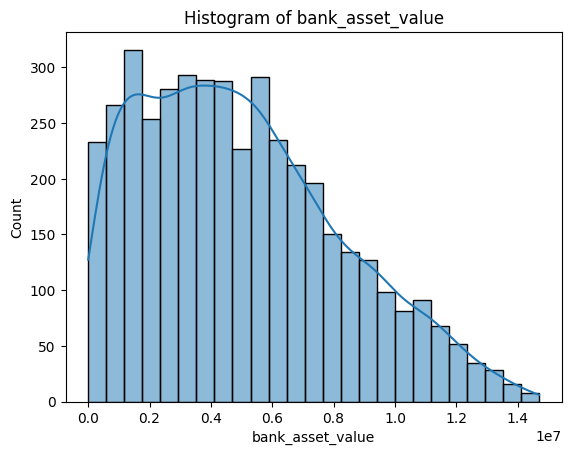

In [ ]:
# Using seaborn for improved aesthetics
for column in data.select_dtypes(include=np.number).columns:
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

**2. Boxplots for Numerical Columns:**

Leverage seaborn for enhanced visual representation.

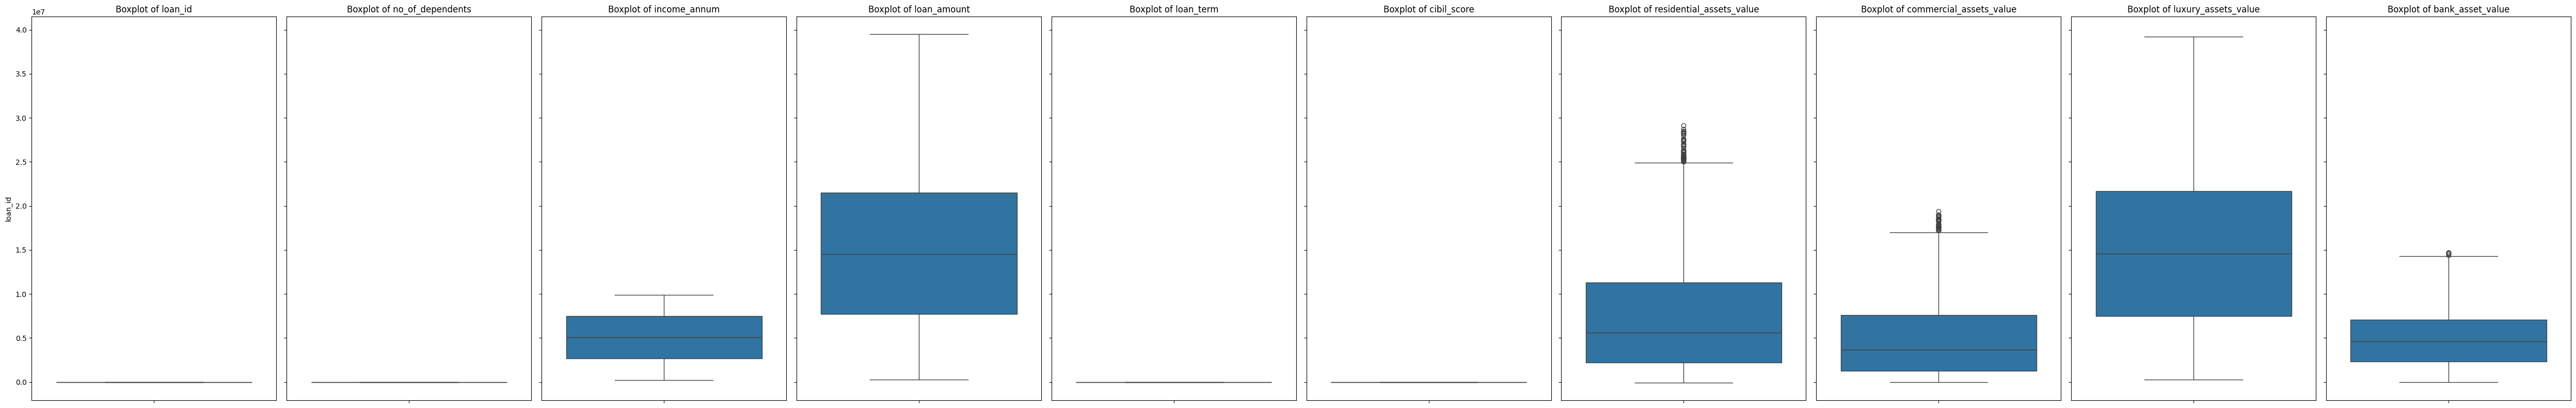

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of numerical columns to figure out the grid size
num_cols = data.select_dtypes(exclude='object').columns
num_plots = len(num_cols)

# Setup the matplotlib figure and axes for a grid of plots
fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 5, 8), sharey=True)

# Iterate over the numerical columns and create a boxplot for each one
for ax, col in zip(axes, num_cols):
    sns.boxplot(y=data[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')

plt.tight_layout()  # Adjust layout to make room for plot titles and avoid overlap
plt.show()

In this code:

We create a figure (fig) and a series of subplots (axes) in a single row with plt.subplots. The number of plots (num_plots) is determined by the count of numerical columns.
Each subplot is associated with one numerical column. The zip(axes, num_cols) function pairs each axis object with a column name, and then a boxplot is drawn on that axis with sns.boxplot.
The figsize is dynamically adjusted based on the number of plots to ensure each boxplot has enough space.
The sharey=True argument is used so all plots share the same y-axis scale, making them easier to compare.

**3. Pivot Table and Bar Chart:**

Introduce pivot_table more efficiently with plot customization.

In this solution:

The reset_index() method is used to flatten the MultiIndex, effectively transforming the hierarchical column structure into a flat structure by promoting the index to a column.
The melt() function is then used to transform the DataFrame from a wide format to a long format. This is helpful because plotly.express functions generally work best with long-format or "tidy" data, where each row represents an observation and each column represents a variable.
Finally, the modified DataFrame pivot_df_long is used with px.bar to create the stacked bar chart. The DataFrame now has a format that specifies the number of dependents, loan status, and count for each row, compatible with Plotly's expectations.
This approach should bypass the TypeError by adapting the data structure for compatibility with plotly.express.

In [ ]:
import plotly.express as px

# Assuming 'data' is your DataFrame and it includes 'no_of_dependents' and 'loan_status' columns

# Create the pivot table
pivot_df = data.pivot_table(index='no_of_dependents', columns='loan_status', aggfunc='size', fill_value=0)

# Resetting index to make 'no_of_dependents' a column again, which is necessary for Plotly
pivot_df_reset = pivot_df.reset_index()

# Melting the pivot table to long format which Plotly can handle more easily
pivot_df_long = pivot_df_reset.melt(id_vars='no_of_dependents', var_name='loan_status', value_name='Number of Applicants')

# Using Plotly for an interactive stacked bar chart
fig = px.bar(pivot_df_long, x='no_of_dependents', y='Number of Applicants', color='loan_status',
             title='Loan Approval by Number of Dependents',
             labels={'no_of_dependents': 'Number of Dependents', 'loan_status': 'Loan Status'},
             barmode='stack')

# Customizing the aesthetics
fig.update_layout(xaxis_title='Number of Dependents',
                  yaxis_title='Number of Applicants',
                  legend_title='Loan Status',
                  coloraxis_colorscale='Viridis')  # Using Viridis color scale for consistency

# Show the plot
fig.show()


**4. Distribution of Self-Employed by Education Level:**

Opt for a direct approach with improved labeling.

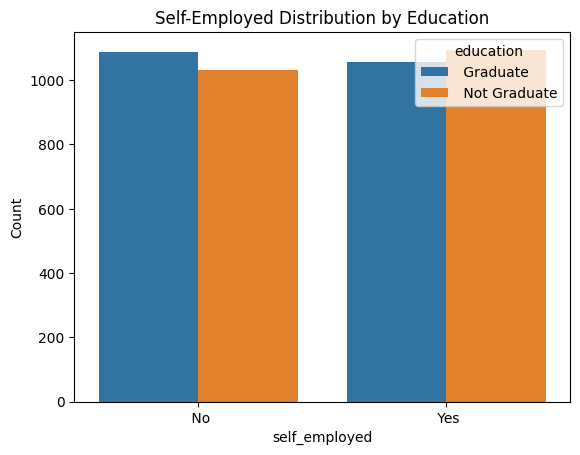

In [ ]:
# Direct plotting with labels
sns.countplot(data=data, x='self_employed', hue='education')
plt.title('Self-Employed Distribution by Education')
plt.ylabel('Count')
plt.show()


In [ ]:
# Creating a pivot tanle pivot_df
pivot_df = data.pivot_table(index='education',
                            columns='loan_status', aggfunc='size', fill_value=0)
pivot_df.head()

loan_status,Approved,Rejected
education,,
Graduate,1339,805
Not Graduate,1317,808


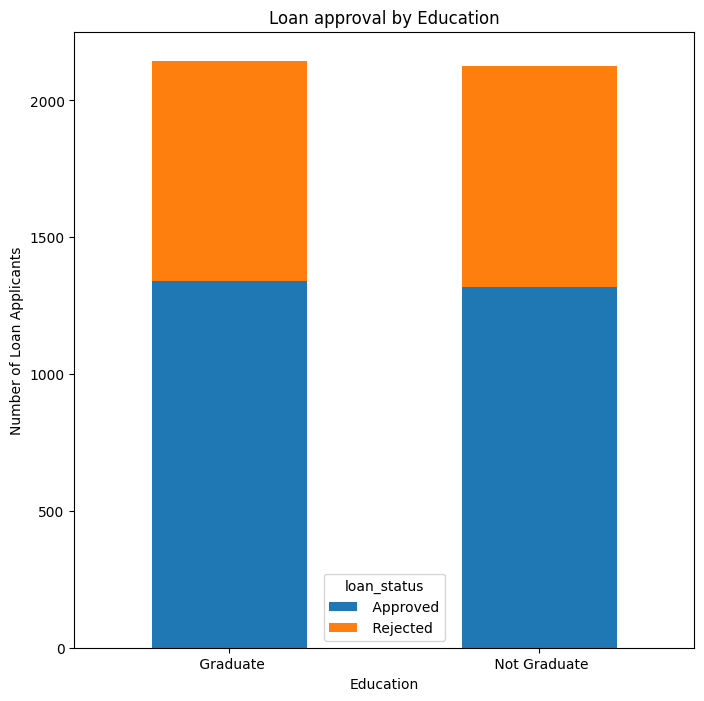

In [ ]:
# Displaying the Loan Approval by Education
pivot_df.plot(kind='bar',stacked=True,figsize=(8, 8))
plt.title('Loan approval by Education')
plt.xlabel('Education')
plt.ylabel('Number of Loan Applicants')
plt.xticks(rotation=0)
plt.show()

Seaborn Stacked Histogram for Visualizing CIBIL Score Distributions by Loan Status :

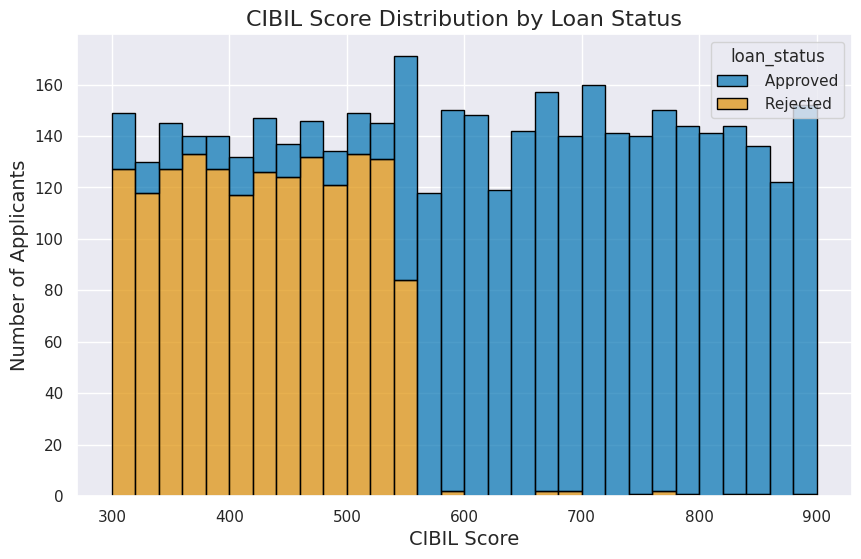

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up seaborn style for the plot
sns.set(style='darkgrid', palette='colorblind')  # 'colorblind' palette for better distinction and accessibility

# Preparing the figure
plt.figure(figsize=(10,6))

# Using seaborn to plot histograms for each 'loan_status'. Seaborn handles legend and color automatically.
sns.histplot(data=data, x='cibil_score', hue='loan_status', bins=30, alpha=0.7, edgecolor='black', multiple='stack')

# Adding plot elements
plt.title('CIBIL Score Distribution by Loan Status', fontsize=16)
plt.xlabel('CIBIL Score', fontsize=14)
plt.ylabel('Number of Applicants', fontsize=14)

plt.show()


In this seaborn approach:

The sns.histplot function directly supports differentiating data based on a categorical variable (using the hue parameter), which means you don’t need to loop through categories manually.
It also supports stacked histograms out of the box via the multiple='stack' parameter, providing a clear, comparative view of distributions across categories.
Seaborn’s default style and color palettes are used to enhance the plot's appearance, but these can be customized as needed.

# Correlation Matrix

In [ ]:
import plotly.figure_factory as ff
import pandas as pd

# Generating a correlation matrix from the numeric columns of the DataFrame
corr_matrix = data.select_dtypes(include=['float64', 'int64', 'float32', 'int32']).corr()

# Using Plotly to create an interactive heatmap of the correlation matrix
fig = ff.create_annotated_heatmap(
    z=corr_matrix.to_numpy(),
    x=corr_matrix.columns.tolist(),
    y=corr_matrix.index.tolist(),
    colorscale='Viridis',  # Corrected colorscale name
    annotation_text=corr_matrix.round(2).to_numpy(),
    showscale=True
)

# Updating the layout of the figure for better readability
fig.update_layout(width=800, height=600, title_text='Correlation Matrix', title_x=0.5)

# Display the interactive heatmap
fig.show()


This code generates an interactive heatmap visualizing the correlation matrix of a DataFrame using Plotly. It selects numerical columns from the DataFrame, computes the correlation matrix, and creates an annotated heatmap with correlation coefficients displayed. The heatmap is displayed with the 'Viridis' colorscale, providing a visually appealing representation of correlations.

# Data Preprocessing

In [ ]:
# Import necessary libraries for data preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

dataset='https://raw.githubusercontent.com/NishaSirdesai09/datascience_002810901/main/loan_approval_ds.csv'
# Load the dataset
data = pd.read_csv(dataset)

# Handling missing values
# For numeric columns, fill missing values with the median
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)

# For categorical columns, fill missing values with the mode
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Encoding categorical variables and scaling numeric features
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [ ]:
# Dropping the column 'loan_id' inplace
data.drop('loan_id', axis=1, inplace=True)

The 'loan_id' typically serves as a unique identifier for each loan application but often does not provide useful information for analysis or modeling. Removing it can help streamline the dataset and improve computational efficiency by reducing unnecessary data. Additionally, dropping irrelevant or redundant columns can simplify the dataset and focus the analysis on the most relevant features.

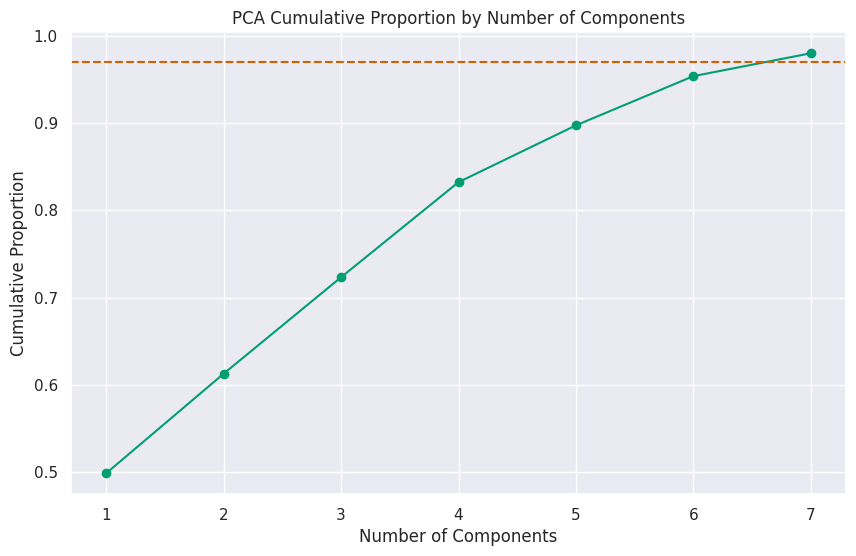

Number of components capturing over 97% variance: 7
[(' commercial_assets_value', 1.7945595831666983), (' residential_assets_value', 1.766141670098933), (' loan_term', 1.7460571236334148), (' bank_asset_value', 1.670404123680569), (' no_of_dependents', 1.636406852904448), (' cibil_score', 1.491960509417738), (' luxury_assets_value', 1.0579037626174936), (' loan_amount', 1.043049009038071), (' income_annum', 0.8086599832946512)]


In [ ]:
# Assuming the initial setup is done (libraries are imported, and the 'data' DataFrame is loaded)

# Standardization of Numeric Data
from sklearn.preprocessing import StandardScaler

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Determine the Optimal Number of Components for PCA
from sklearn.decomposition import PCA
import numpy as np

# Assuming 'std_scalar' refers to the standardized numeric data
std_scalar = data[numeric_columns].values

cumulative_proportions = []
n_components_for_97_var = 0
for n in range(1, std_scalar.shape[1] + 1):
    pca = PCA(n_components=n)
    pca.fit(std_scalar)
    cumulative_proportion = np.cumsum(pca.explained_variance_ratio_)[-1]
    cumulative_proportions.append(cumulative_proportion)
    if cumulative_proportion >= 0.97:
        n_components_for_97_var = n
        break

# Plotting the Cumulative Proportion of Variance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, n+1), cumulative_proportions, marker='o', linestyle='-', color='g')
plt.title('PCA Cumulative Proportion by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Proportion')
plt.grid(True)
plt.xticks(range(1, n+1))
plt.axhline(y=0.97, color='r', linestyle='--')
plt.show()

print(f"Number of components capturing over 97% variance: {n_components_for_97_var}")

# Apply PCA with optimal components
pca_optimal = PCA(n_components=n_components_for_97_var)
pca_optimal.fit(std_scalar)

# Feature Importance from PCA Components
feature_importances = {}
columns = numeric_columns  # Ensure this contains the correct column names for features considered in PCA

for component in pca_optimal.components_:
    for i, loading in enumerate(component):
        feature_name = columns[i]
        abs_loading = abs(loading)
        feature_importances[feature_name] = feature_importances.get(feature_name, 0) + abs_loading

# Sorting the features based on importance
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
print(sorted_features)

# Encoding and Feature Engineering steps would follow here

In [ ]:
print(data.columns)

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Encoding categorical variables
categorical_vars = [' education', ' self_employed',' loan_status']
ordinal_encoder = OrdinalEncoder()
data[categorical_vars] = ordinal_encoder.fit_transform(data[categorical_vars])

In [ ]:
# Combining asset features
data['Movable_assets'] = data[' bank_asset_value'] + data[' luxury_assets_value']
data['Immovable_assets'] = data[' residential_assets_value'] + data[' commercial_assets_value']

# Dropping the original asset columns
data.drop(columns=[' bank_asset_value', ' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value'], inplace=True)

## Preparing and Displaying a Modified DataFrame for PCA

In [ ]:
# Making a copy of the DataFrame for PCA, ensuring we work with the modified 'data' DataFrame
df_pca = data.copy()

# Dropping specific columns from the PCA DataFrame
df_pca.drop(columns=[' loan_amount', ' income_annum'], inplace=True)

# Display the first few rows of both DataFrames to verify changes
print("Original DataFrame:")
print(data.head())
print("\nDataFrame for PCA:")
print(df_pca.head())

Original DataFrame:
    no_of_dependents   education   self_employed   income_annum   loan_amount  \
0          -0.294102         0.0             0.0       1.617979      1.633052   
1          -1.473548         1.0             1.0      -0.341750     -0.324414   
2           0.295621         0.0             0.0       1.439822      1.610933   
3           0.295621         0.0             0.0       1.119139      1.721525   
4           1.475067         1.0             1.0       1.689242      1.002681   

    loan_term   cibil_score   loan_status  Movable_assets  Immovable_assets  
0    0.192617      1.032792           0.0        1.762333          2.097231  
1   -0.508091     -1.061051           1.0       -1.210930         -1.365845  
2    1.594031     -0.544840           1.0        4.403836         -0.165119  
3   -0.508091     -0.771045           1.0        1.797476          1.268374  
4    1.594031     -1.264055           1.0        1.575247          1.493027  

DataFrame for PCA:
    n

## Scatter Matrix for Selected Features

In [ ]:
# Creating a subset DataFrame for visualization
scattermatrix = data[[' loan_term',
                    ' cibil_score',' loan_status',
                    'Movable_assets','Immovable_assets']]
print("Scatter Matrix DataFrame:")
print(scattermatrix.head())


Scatter Matrix DataFrame:
    loan_term   cibil_score   loan_status  Movable_assets  Immovable_assets
0    0.192617      1.032792           0.0        1.762333          2.097231
1   -0.508091     -1.061051           1.0       -1.210930         -1.365845
2    1.594031     -0.544840           1.0        4.403836         -0.165119
3   -0.508091     -0.771045           1.0        1.797476          1.268374
4    1.594031     -1.264055           1.0        1.575247          1.493027


## Visualizing Relationships with a Scatter Matrix

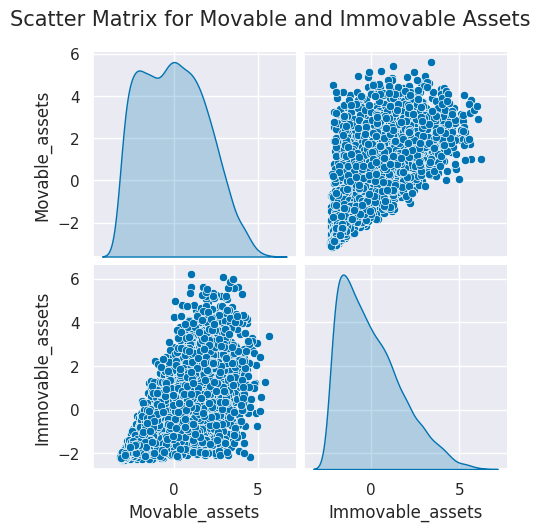

In [ ]:
import seaborn as sns

# Plotting a Scatter Matrix focusing on Movable and Immovable Assets
sns.pairplot(scattermatrix, vars=['Movable_assets', 'Immovable_assets'], kind='scatter', diag_kind='kde')
plt.suptitle('Scatter Matrix for Movable and Immovable Assets', size=15, y=1.05)
plt.show()


# Data Partitioning

In [ ]:
print(data.columns)


Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score', ' loan_status',
       'Movable_assets', 'Immovable_assets'],
      dtype='object')


In [42]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and 'loan_status' is your target variable
# Also assuming that leading spaces have been removed from column names as discussed
X = data.drop(' loan_status', axis=1)
y = data[' loan_status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now, X_train, X_test, y_train, and y_test should be defined

# Data Mining Models/Method

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [44]:
from sklearn.metrics import accuracy_score, classification_report

# Initialize a list to store model performance results
model_performance = []

def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

def calculate_performance(model, X_test, y_test):
    # Generate predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate a classification report
    report = classification_report(y_test, y_pred, labels=[0, 1], target_names=['0', '1'], output_dict=True)

    # Extract performance metrics
    validation_error = 1 - accuracy
    sensitivity = report['1']['recall']
    specificity = report['0']['recall']
    f1_score = report['1']['f1-score']

    # Prepare and return the metrics dictionary
    metrics = {
        'Accuracy': accuracy,
        'Validation Error': validation_error,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'F1 Score': f1_score
    }

    return metrics


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    # Predictions
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

In [49]:

def plot_model_roc_curve(model, X_test, y_test):
    """Plot the ROC curve for the model using the test dataset"""
    plt.figure(figsize=(8, 6))
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plt.plot(fpr, tpr, label=f"{model.__class__.__name__} (AUC = {auc(fpr, tpr):.2f})", lw=2)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

def compute_model_errors(model, X_train, y_train, X_test, y_test):

    """Compute and return training and testing errors for the model."""

    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_error = 1 - accuracy_score(y_train, train_preds)
    test_error = 1 - accuracy_score(y_test, test_preds)
    return train_error, test_error

# Defining models
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Support Vector Machine', SVC(probability=True)),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]


## Model Evaluation

In [58]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_metrics(model, X_test, y_test):
    """
    Calculate performance metrics for a given model based on the test data.

    Parameters:
    - model: The trained model.
    - X_test: Test features.
    - y_test: True labels for the test set.

    Returns:
    - A dictionary containing accuracy, precision, recall, and F1 score.
    """
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }


In [62]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(model, X_test, y_test):
    """
    Prints the confusion matrix for the predictions made by the model on the test dataset.
    """
    # Generate predictions
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()


In [68]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluate a single model on given training and test data.
    """
    print(f'Now evaluating: {model.__class__.__name__}')

    # Train the model and calculate errors
    trained_model = train_model(model, X_train, y_train)
    train_error, test_error = calculate_errors(trained_model, X_train, y_train, X_test, y_test)

    # Calculate additional metrics
    metrics = calculate_metrics(trained_model, X_test, y_test)

    # Print errors and metrics
    print(f'Training Error: {train_error:.4f}, Test Error: {test_error:.4f}')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value:.4f}')

    # Print confusion matrix and plot ROC curve
    print('Confusion Matrix:')
    print_confusion_matrix(trained_model, X_test, y_test)
    print(f'ROC Curve for {model.__class__.__name__}:')
    plot_model_roc_curve(trained_model, X_test, y_test)

    return {
        'model': trained_model,
        'train_error': train_error,
        'test_error': test_error,
        **metrics
    }

def evaluate_models(models, X_train, y_train, X_test, y_test):
    """
    Evaluate multiple models and return their trained instances and performance metrics.
"""
    evaluations = {}
    for model_name, model in models:
        print(f"\n--- Evaluating: {model_name} ---")
        evaluation = evaluate_model(model, X_train, y_train, X_test, y_test)
        evaluations[model_name] = evaluation
    return evaluations



--- Evaluating: Random Forest ---
Now evaluating: RandomForestClassifier
Training Error: 0.0000, Test Error: 0.0172
Accuracy: 0.9828
Precision: 0.9870
Recall: 0.9660
F1 Score: 0.9764
Confusion Matrix:


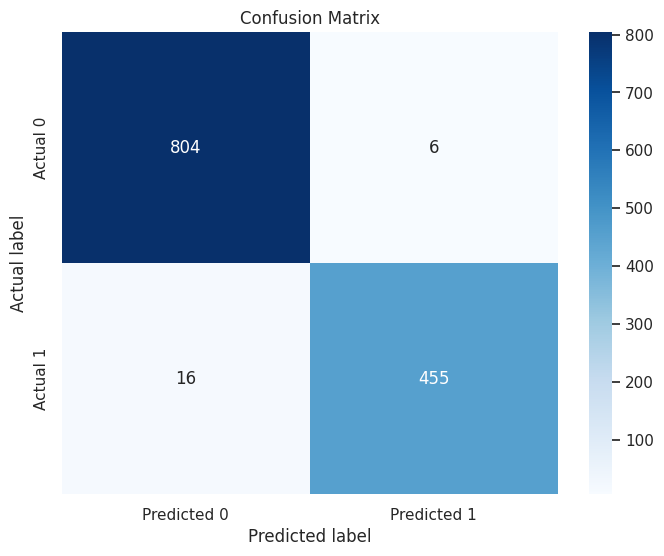

ROC Curve for RandomForestClassifier:


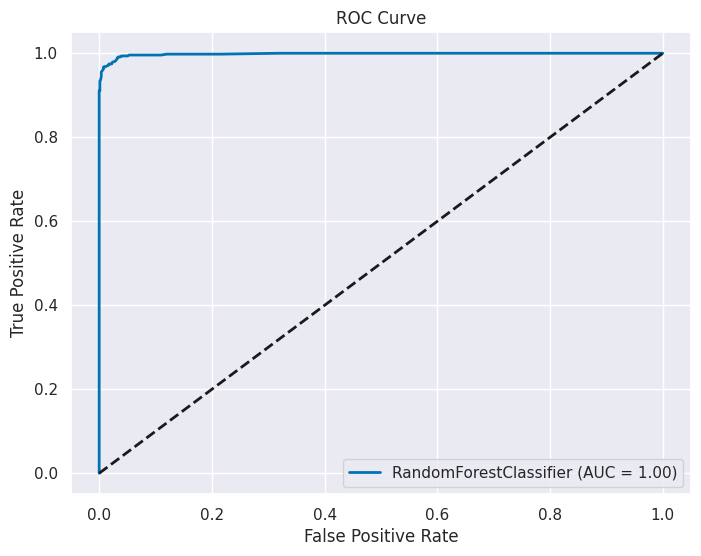


--- Evaluating: Logistic Regression ---
Now evaluating: LogisticRegression
Training Error: 0.0770, Test Error: 0.0968
Accuracy: 0.9032
Precision: 0.8653
Recall: 0.8726
F1 Score: 0.8689
Confusion Matrix:


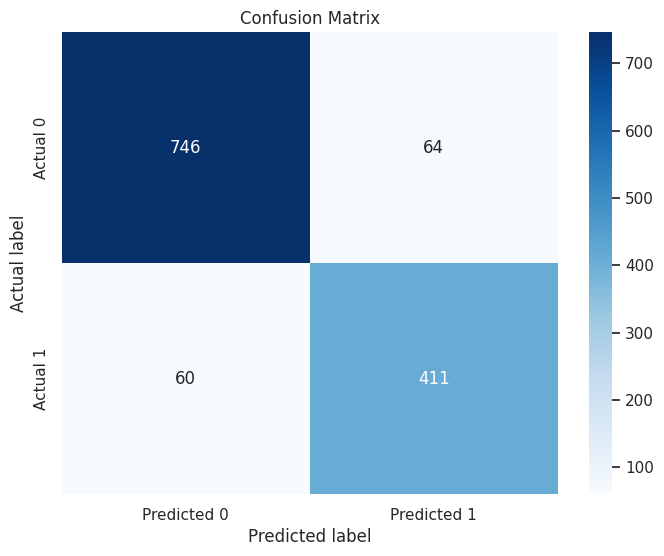

ROC Curve for LogisticRegression:


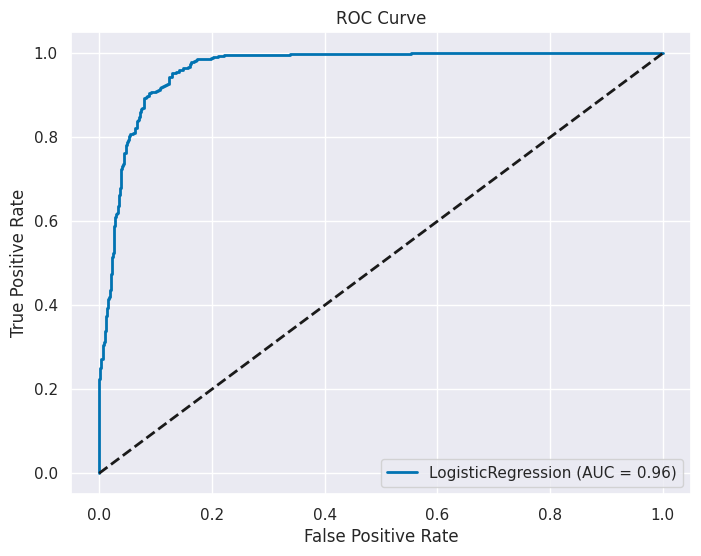


--- Evaluating: Decision Tree ---
Now evaluating: DecisionTreeClassifier
Training Error: 0.0000, Test Error: 0.0195
Accuracy: 0.9805
Precision: 0.9765
Recall: 0.9703
F1 Score: 0.9734
Confusion Matrix:


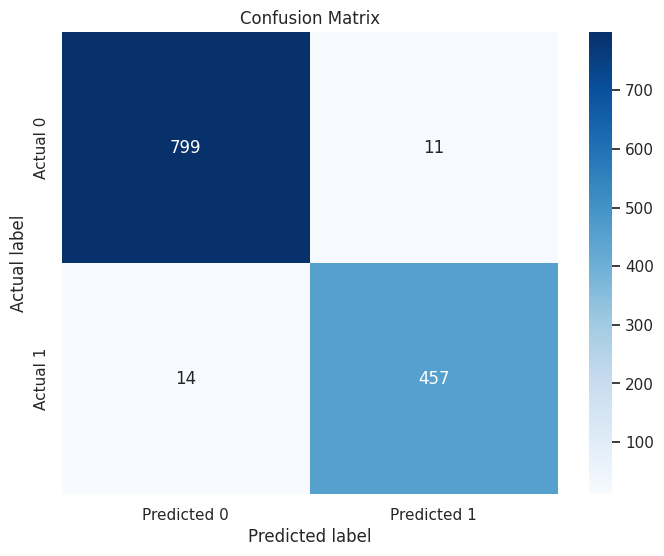

ROC Curve for DecisionTreeClassifier:


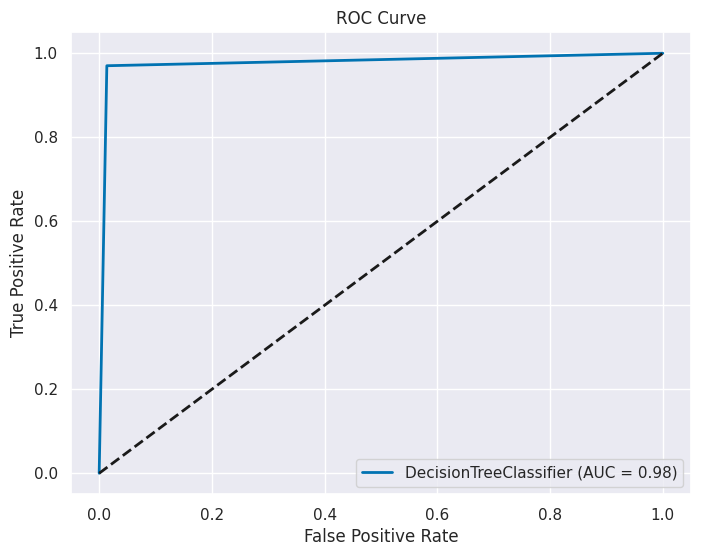


--- Evaluating: Support Vector Machine ---
Now evaluating: SVC
Training Error: 0.0448, Test Error: 0.0718
Accuracy: 0.9282
Precision: 0.8891
Recall: 0.9193
F1 Score: 0.9040
Confusion Matrix:


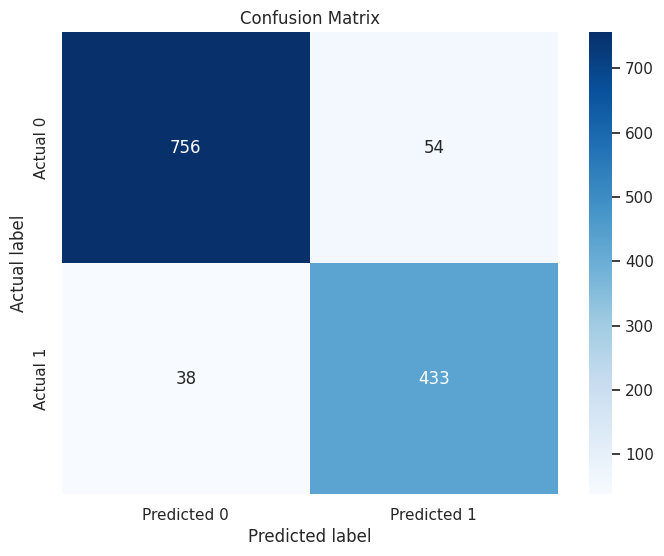

ROC Curve for SVC:


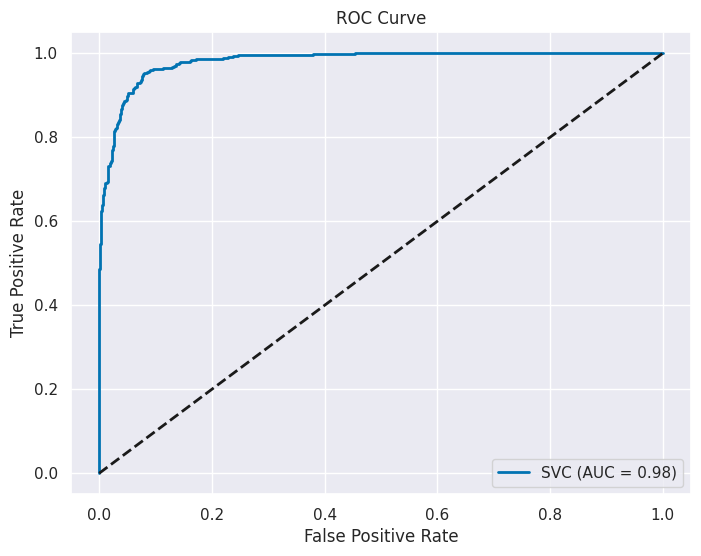


--- Evaluating: K-Nearest Neighbors ---
Now evaluating: KNeighborsClassifier
Training Error: 0.0509, Test Error: 0.1030
Accuracy: 0.8970
Precision: 0.8370
Recall: 0.8938
F1 Score: 0.8645
Confusion Matrix:


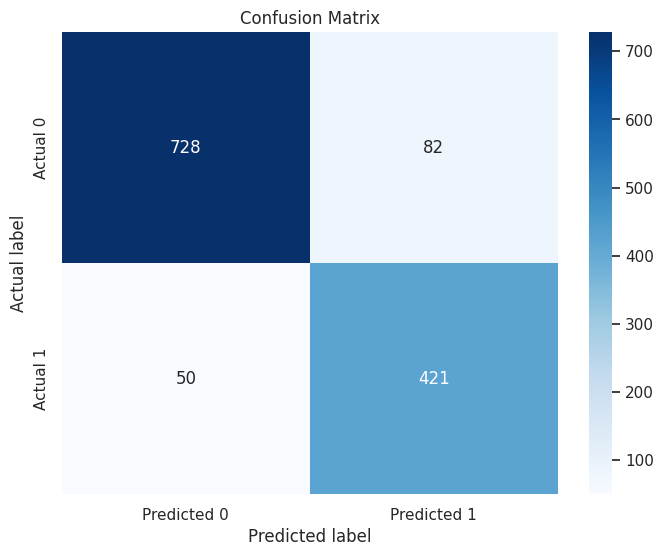

ROC Curve for KNeighborsClassifier:


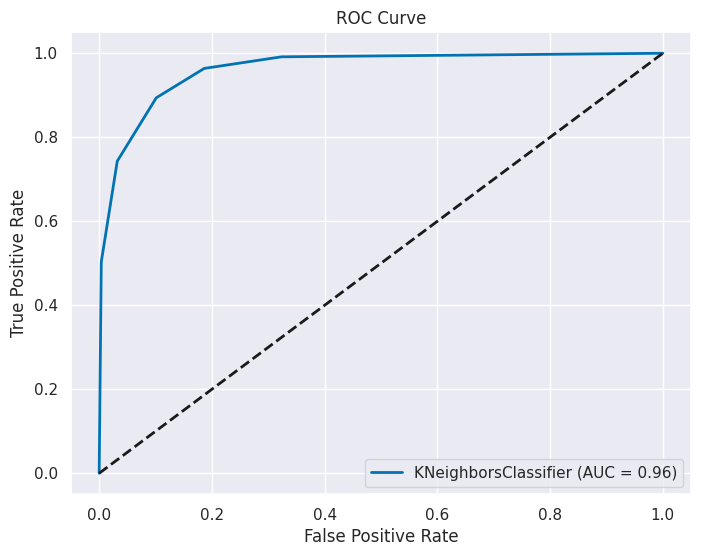

In [69]:
# Evaluating all models
trained_models = evaluate_models(models, X_train, y_train, X_test, y_test)

In [70]:
# Attempt to extract the Random Forest model from the evaluation results
random_forest_model = trained_models.get('Random Forest', {}).get('model')

# Check if the Random Forest model was successfully extracted
if random_forest_model:
    print("Random Forest model extracted successfully.")
else:
    print("Random Forest model not found.")

Random Forest model extracted successfully.


In [72]:
# Assuming you have a RandomForestClassifier named 'rf_model'
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_preprocessed, y_train)

# Extract feature importance
importances = rf_model.feature_importances_

# Assuming you have a preprocessor with one-hot encoded categorical features
# Get feature names
feature_names = numeric_features.tolist() + \
                list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features))

# Map feature names with their importance scores
feature_importance_dict = dict(zip(feature_names, importances))

# Visualize Feature Importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importance_dict)), list(feature_importance_dict.values()), align='center')
plt.yticks(range(len(feature_importance_dict)), list(feature_importance_dict.keys()))
plt.xlabel('Feature Importance')
plt.title('Feature Importance Extracted from Random Forest Model')
plt.show()


NameError: name 'X_train_preprocessed' is not defined

Feature Importances for Random Forest:


,Feature,Importance
6,cibil_score,0.83
5,loan_term,0.06
4,loan_amount,0.03
8,Immovable_assets,0.02
7,Movable_assets,0.02
3,income_annum,0.02
0,no_of_dependents,0.01
1,education,0.00
2,self_employed,0.00


<ipython-input-81-d11a6ef00d93>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




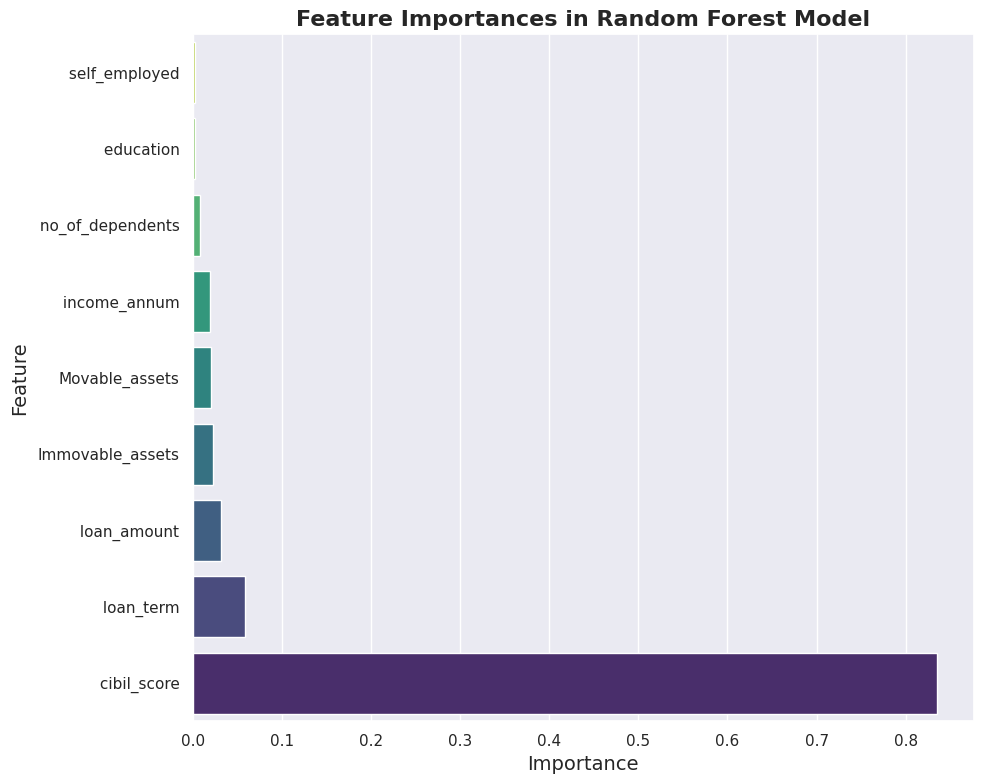

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming random_forest_model is your trained Random Forest model
# and X_train, y_train have been defined and used for training

# Get feature importance
importances = random_forest_model.feature_importances_

# Note: Adjust this if X_train doesn't directly provide feature names after preprocessing
# This is particularly relevant if preprocessing significantly alters column names (e.g., one-hot encoding)
feature_names = X_train.columns  # Placeholder, adjust as needed based on actual preprocessing steps

# Create a DataFrame to store feature names and their importance
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the DataFrame with styling
print("Feature Importances for Random Forest:")
display(feature_importances.style.background_gradient(cmap='viridis')
         .format({'Importance': '{:.2f}'}))  # Use format for precision

# Plotting the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importances in Random Forest Model', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [79]:
print("Feature Importances for Random Forest:")

print(feature_importances)

Feature Importances for Random Forest:
             Feature  Importance
6        cibil_score    0.834791
5          loan_term    0.058977
4        loan_amount    0.031468
8   Immovable_assets    0.022795
7     Movable_assets    0.020095
3       income_annum    0.018963
0   no_of_dependents    0.008096
1          education    0.002445
2      self_employed    0.002371
